In [97]:
import numpy as np
from oasis.functions import deconvolve
import matplotlib.pyplot as plt

In [98]:
#fp = '/mnt/e/dhh-soltesz-lab/zfish-proj/src-parallel/operation-figgeritout/data/ca1/JF_200_105.npz'
fp = '/mnt/e/dhh-soltesz-lab/barna-data/seizure/data.npz'
f = np.load(fp)

traces = f['traces'].T

## seizure onset at time = 5200
## break pre into four pieces, 2200 - 3200, 3200 - 4200, 4200 - 5200
## break post into 8000 - 9000

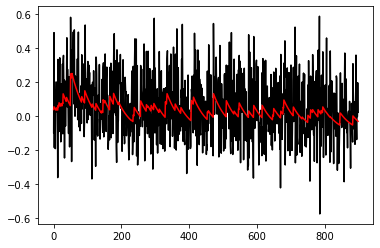

In [99]:
deconvolved_traces = []
for trace in traces:
    c, s, b, g, lam = deconvolve(trace, penalty=1, b_nonneg=False)
    deconvolved_traces.append(c+b)
deconvolved_traces = np.asarray(deconvolved_traces, dtype='float32')

plt.figure()
plt.plot(traces[0,100:1000], color='k')
plt.plot(deconvolved_traces[0,100:1000], color='r')

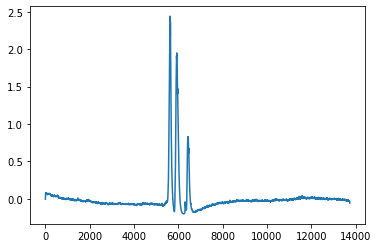

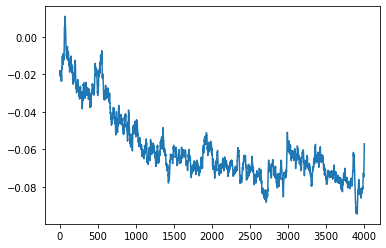

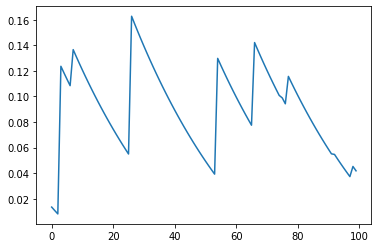

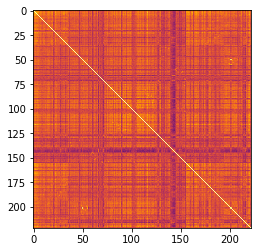

In [102]:
plt.figure()
plt.plot(deconvolved_traces.mean(axis=0))
plt.show()

plt.figure()
plt.plot(deconvolved_traces.mean(axis=0)[1400:5400])
# 1400 - 5400

plt.figure()
plt.plot(deconvolved_traces[0,:100])
plt.show()

plt.figure()
plt.imshow(np.corrcoef(deconvolved_traces[:,1400:5400]), vmin=-1., vmax=1., cmap='inferno')
plt.show()

In [26]:
np.savez('/mnt/e/dhh-soltesz-lab/zfish-proj/src-parallel/operation-figgeritout/data/ca1/generalized-sz.npz', traces=deconvolved_traces)

In [2]:
from ImportFirst import *
from ImagingSession import ImagingSession

In [15]:

path = '/mnt/f/dhh-soltesz-lab/ca1-data/control-pvchr_237_400'
prefix = 'pvchr_237_400'
tag1 = 'ALL'  # all cells, including pyramidal cells
tag2 = 'R'  # putative PV cells

# the two sets of cells are read to separate ImagingSession objects, these will have the same frames but different cells.
os.chdir(path)
session = ImagingSession(prefix, tag=tag1)
session_red = ImagingSession(prefix, tag=tag2)


# cells that had deconvolved spikes ('nnd'), as well as 3 sd events ('peaks'):
qc = numpy.logical_and(numpy.any(numpy.nan_to_num(session.ca.nnd) > 0, axis=1),
                       numpy.any(numpy.nan_to_num(session.ca.peaks) > 0, axis=1))

compute_place_cells = False  # takes some time to run, I usually run this once and save the indices of cells
#  find cells that were place cells - the fact that a cell is place cell kind of proves it's a pyramidal cell:
# if compute_place_cells:
#     session.placefields_smooth(param='nnd', silent=True)  # estimate location of place field for each cell
#     session.calc_MI()  # compute the mututal information for each cell's activity and mouse position, see if above 95 percentile of shuffled
#     pc_order = numpy.array([c for c in session.corder_smoothpf if session.statistical_is_placecell[c] and qc[c]],
#                            dtype='int')

#     # plt.imshow(session.smooth_zscores[:, pc_order].transpose(), aspect='auto')
#     # ca = plt.gca()
#     # ca.set_xlabel('Location (bins)')
#     # ca.set_ylabel('# of cell')
# else:
#     pc_order = numpy.array([c for c in range(session.ca.cells) if session.statistical_is_placecell[c] and qc[c]],
#                            dtype='int')

mean_all = numpy.nanmean(session.ca.rel, axis=0)
mean_red = numpy.nanmean(session_red.ca.rel, axis=0)

running_frames = session.pos.gapless # this indicates which frames were running




Polys loaded from pvchr_237_400_saved_roi_ALL.npy
pvchr_237_400.mat
pvchr_237_400-ALL-ch0.np
Polys loaded from pvchr_237_400_saved_roi_R.npy
pvchr_237_400.mat
pvchr_237_400-R-ch0.np


(2554, 9137)


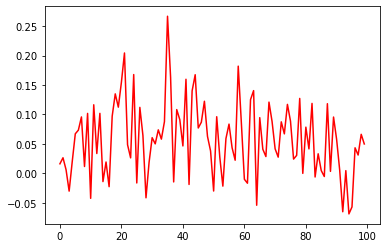

In [53]:
%matplotlib inline

print(session.ca.rel.shape)
plt.figure()
plt.plot(session.ca.rel[0,:100], color='r')
plt.show()

#np.savez('/mnt/e/dhh-soltesz-lab/zfish-proj/src-parallel/operation-figgeritout/data/ca1/control-1.npz', traces=session.ca.smtr)

(874, 16218)


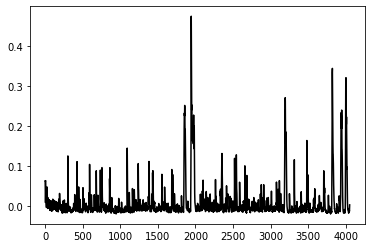

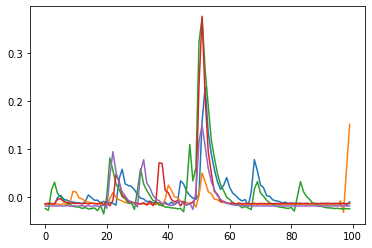

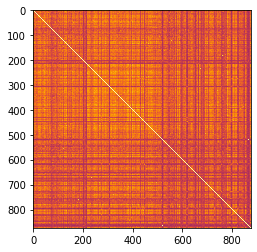

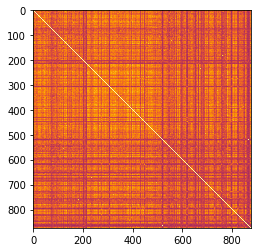

In [121]:
path = '/mnt/f/dhh-soltesz-lab/ca1-data/ax-126-363/rel.npy'
from scipy.signal import decimate
# this is 'control 2'. t1, t2 = 1000, 5800

traces = np.load(path)
# deconvolved_traces = []
# for trace in traces:
#     c, s, b, g, lam = deconvolve(trace, penalty=1, b_nonneg=False)
#     deconvolved_traces.append(c+b)
# deconvolved_traces = np.asarray(deconvolved_traces, dtype='float32')

decimated_traces = decimate(deconvolved_traces,4)
print(traces.shape)

plt.figure()
plt.plot(decimated_traces.mean(axis=0)[:], color='k')
plt.show()

plt.figure()
plt.plot(decimated_traces[0:5,250:350].T)
plt.show()


plt.figure()
plt.imshow(np.corrcoef(deconvolved_traces[:,1000:5800]), vmin=-1., vmax=1., cmap='inferno')
plt.show()

plt.figure()
plt.imshow(np.corrcoef(decimated_traces[:,250:1450]), vmin=-1., vmax=1., cmap='inferno')
plt.show()

#np.savez('/mnt/e/dhh-soltesz-lab/zfish-proj/src-parallel/operation-figgeritout/data/ca1/control-2.npz', traces=deconvolved_traces)

(496, 9481)
